In [23]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from pandas.tools.plotting import scatter_matrix
from pandas.stats.api import ols
matplotlib.style.use('ggplot')
import statsmodels.formula.api as sm
import statsmodels.stats.api as sms
from sklearn import linear_model
import plotly
from plotly.graph_objs import *

In [2]:
bp_data = pd.read_csv('Ex03_SystolicBP_Regreesion.csv')
bp_data.dtypes

Age             int64
Treated         int64
Gender          int64
FamilySize      int64
Diet            int64
Weight        float64
Height        float64
ScaledBMI     float64
SystolicBP    float64
dtype: object

In [3]:
columns = bp_data.describe(include=['float64', 'int64']).columns
for col in columns:
    bp_data[col] = bp_data[col].apply(lambda x :(x-bp_data[col].mean())/bp_data[col].std())


In [4]:
bp_data.describe()

,Age,Treated,Gender,FamilySize,Diet,Weight,Height,ScaledBMI,SystolicBP
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,3.264056e-16,-7.327472e-17,6.217249e-17,1.665335e-17,3.108624e-17,3.841372e-16,4.093392e-15,-1.731948e-16,2.020606e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.346521e+00,-1.078042e+00,-8.819621e-01,-1.332567e+00,-9.559530e-01,-4.216416e+00,-2.129490e+00,-2.656188e+00,-2.146235e+00
25%,-7.319423e-01,-1.078042e+00,-8.819621e-01,-6.480293e-01,-9.559530e-01,-6.524844e-01,-6.860927e-01,-6.716524e-01,-7.301334e-01
50%,-5.920121e-02,9.183318e-01,-8.819621e-01,-4.198500e-01,-9.559530e-01,-6.482988e-02,4.504413e-02,3.530476e-02,-6.178687e-02
75%,6.471769e-01,9.183318e-01,1.122497e+00,4.928673e-01,1.035616e+00,7.798969e-01,5.974271e-01,5.435263e-01,6.319984e-01
max,2.766311e+00,9.183318e-01,1.122497e+00,1.405585e+00,1.035616e+00,2.105310e+00,2.979129e+00,2.787074e+00,2.736599e+00


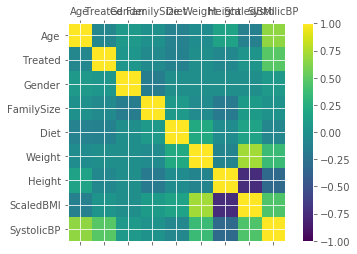

,Age,Treated,Gender,FamilySize,Diet,Weight,Height,ScaledBMI,SystolicBP
Age,1.000000,-0.072606,0.075297,0.004664,-0.114006,-0.028380,0.151895,-0.126357,0.669539
Treated,-0.072606,1.000000,0.050122,-0.052271,-0.117269,-0.006899,-0.069158,0.033868,0.476901
Gender,0.075297,0.050122,1.000000,-0.152274,-0.004839,-0.003728,-0.002139,-0.007238,0.083053
FamilySize,0.004664,-0.052271,-0.152274,1.000000,0.071975,-0.038084,-0.178930,0.088567,0.020711
Diet,-0.114006,-0.117269,-0.004839,0.071975,1.000000,0.214507,-0.030904,0.150477,-0.071370
Weight,-0.028380,-0.006899,-0.003728,-0.038084,0.214507,1.000000,-0.100371,0.725423,0.361718
Height,0.151895,-0.069158,-0.002139,-0.178930,-0.030904,-0.100371,1.000000,-0.746394,-0.307311
ScaledBMI,-0.126357,0.033868,-0.007238,0.088567,0.150477,0.725423,-0.746394,1.000000,0.447285
SystolicBP,0.669539,0.476901,0.083053,0.020711,-0.071370,0.361718,-0.307311,0.447285,1.000000


In [5]:
correlations = bp_data.corr()
fig = plt.figure()
names = bp_data.columns
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
correlations

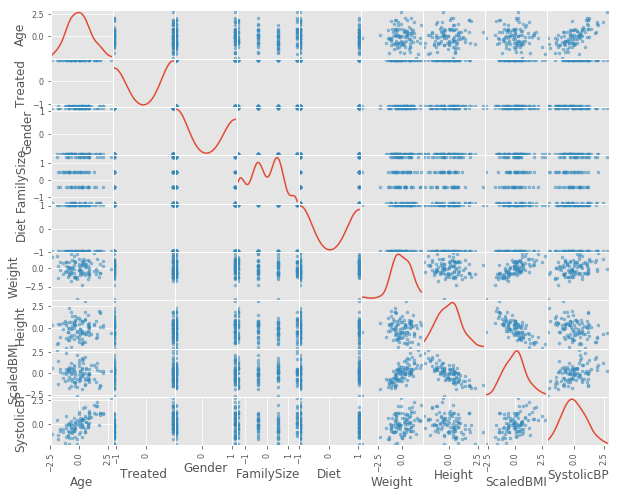

In [6]:
scatter_matrix(bp_data, diagonal='kde', figsize=(10,8))
plt.show()

In [7]:
splitend = int(0.8 * len(bp_data))
bp_data_shuffled = bp_data.sample(frac=1)
train, test = bp_data_shuffled[:splitend], bp_data_shuffled[splitend:]
x_train = train.ix[:, :-1]
y_train = train.ix[:, -1]
x_test = test.ix[:, :-1]
y_test = test.ix[:, -1]

## OLS Model

In [87]:
model1 = sm.ols(formula='SystolicBP~Age+Treated+ScaledBMI', data=train).fit()

In [88]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SystolicBP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.789e+04
Date:                Sun, 02 Apr 2017   Prob (F-statistic):          2.02e-132
Time:                        16:34:37   Log-Likelihood:                 205.69
No. Observations:                  80   AIC:                            -403.4
Df Residuals:                      76   BIC:                            -393.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0002      0.002     -0.090      0.928      -0.004       0.004
Age            0.7734      0.002    377.367      0.000       0.769       0.777
Treated        0.5171      0.002    239.748      0.000       0.513       0.521
ScaledBMI      0.5275      0.002    248.311      0.000       0.523       0.532
==============================================================================
Omnibus:                        2.759   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                2.057
Skew:                           0.356   Prob(JB):                        0.357
Kurtosis:                       3.333   Cond. No.                         1.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
predictions1 = model1.predict(x_test)

In [90]:
np.mean((y_test - predictions1)**2)**0.5

0.020347134703053129

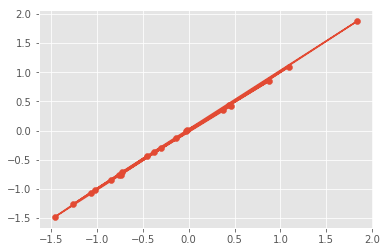

In [91]:
plt.scatter(y_test, predictions1)
plt.plot(y_test, predictions1)
plt.show()

In [92]:
residuals = y_test - predictions1

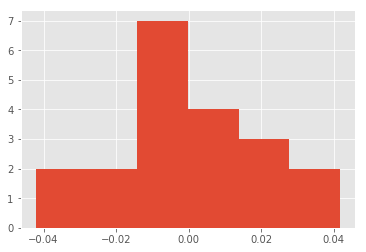

In [93]:
plt.hist(residuals, bins=6)
plt.show()

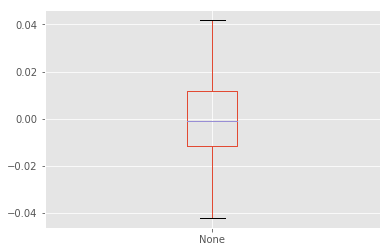

In [94]:
residuals.plot(kind='box')
plt.show()

In [95]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model1.resid, model1.model.exog)
list(zip(name, test))

[('F statistic', 1.2209557046736474), ('p-value', 0.27616630492400718)]

## Lasso

In [55]:
alphas_lasso = np.linspace(0.01, 5,100)
fdf=pd.DataFrame()
model = linear_model.Lasso()
coeff = []
for a in alphas_lasso:
    model.set_params(alpha=a)
    model.fit(x_train, y_train)
    coeff.append(model.coef_)
cdf = pd.DataFrame(coeff, columns=x_train.columns)
adf = pd.DataFrame(alphas_lasso, columns=['alphas'])
fdf = cdf.join(adf)
fdf.head()

,Age,Treated,Gender,FamilySize,Diet,Weight,Height,ScaledBMI,alphas
0,0.761699,0.506263,0.0,-0.0,-0.0,0.005544,-0.0,0.512512,0.010000
1,0.706050,0.452220,0.0,0.0,-0.0,0.000000,-0.0,0.461787,0.060404
2,0.649881,0.398071,0.0,0.0,-0.0,0.000000,-0.0,0.406993,0.110808
3,0.593714,0.343921,0.0,0.0,-0.0,0.000000,-0.0,0.352198,0.161212
4,0.537546,0.289771,0.0,0.0,-0.0,0.000000,-0.0,0.297403,0.211616


In [57]:
trace0 = Scatter(
    x = alphas_lasso,
    y = fdf['Age'],
    name = 'Age',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = Scatter(
    x = alphas_lasso,
    y = fdf['Treated'],
    name = 'Treated',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = Scatter(
    x = alphas_lasso,
    y = fdf['Gender'],
    name = 'Gender',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = Scatter(
    x = alphas_lasso,
    y = fdf['FamilySize'],
    name = 'FamilySize',
    line = dict(
        color = ('rgb(212, 196, 107)'),
        width = 4,
        dash = 'dash')
)
trace4 = Scatter(
    x = alphas_lasso,
    y = fdf['Diet'],
    name = 'Diet',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)
trace5 = Scatter(
    x = alphas_lasso,
    y = fdf['Weight'],
    name = 'Weight',
    line = dict(
        color = ('rgb(102, 46, 100)'),
        width = 4,
        dash = 'dash')
)
trace6 = Scatter(
    x = alphas_lasso,
    y = fdf['Height'],
    name = 'Height',
    line = dict(
        color = ('rgb(140, 40, 203)'),
        width = 4,)
)
trace7 = Scatter(
    x = alphas_lasso,
    y = fdf['ScaledBMI'],
    name = 'ScaledBMI',
    line = dict(
        color = ('rgb(127, 140, 103)'),
        width = 4,)
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(xaxis = dict(title = 'alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data=data, layout=layout)
plotly.offline.plot(fig, filename='LassoRegression.html')

'file:///home/user/ml_regression/SystolicDataset/LassoRegression.html'

## LassoCV

In [58]:
lassocv = linear_model.LassoCV(alphas=alphas_lasso, cv=10, max_iter=100000)

In [59]:
lassocv.fit(x_train, y_train)
predictions = lassocv.predict(x_test)
for i, j in zip(x_train.columns, lassocv.coef_):
    print (i, j)

Age 0.761699252362
Treated 0.506262607758
Gender 0.0
FamilySize -0.0
Diet -0.0
Weight 0.00554350798211
Height -0.0
ScaledBMI 0.512511979719


In [60]:
np.mean((y_test - predictions)**2)**0.5

0.022430995570851472

In [61]:
lassocv.alpha_

0.01

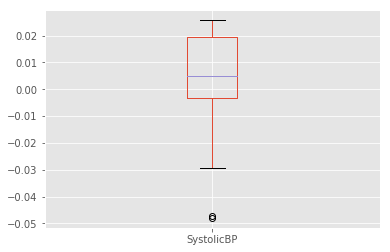

In [62]:
residuals = predictions - y_test
residuals.plot(kind='box')
plt.show()

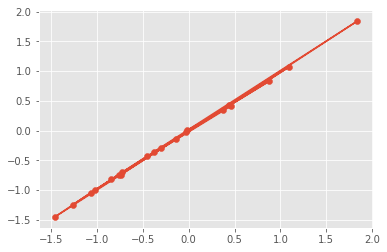

In [63]:
plt.scatter(y_test, predictions)
plt.plot(y_test, predictions)
plt.show()

## Ridge

In [35]:
alphas_ridge = np.linspace(-1, 1,100)
fdf=pd.DataFrame()
model = linear_model.Ridge()
coeff = []
for a in alphas_ridge:
    model.set_params(alpha=a)
    model.fit(x_train, y_train)
    coeff.append(model.coef_)
cdf = pd.DataFrame(coeff, columns=x_train.columns)
adf = pd.DataFrame(alphas_ridge, columns=['alphas'])
fdf = cdf.join(adf)
fdf.head()

,Age,Treated,Gender,FamilySize,Diet,Weight,Height,ScaledBMI,alphas
0,0.769285,0.512001,-0.008804,-0.014259,-0.016310,0.612920,-0.628460,-0.391105,-1.000000
1,0.768468,0.511281,-0.009264,-0.014748,-0.017072,0.641132,-0.657663,-0.433887,-0.979798
2,0.767564,0.510480,-0.009795,-0.015310,-0.017938,0.673420,-0.691093,-0.482844,-0.959596
3,0.766553,0.509579,-0.010414,-0.015963,-0.018930,0.710735,-0.729738,-0.539420,-0.939394
4,0.765408,0.508553,-0.011143,-0.016730,-0.020082,0.754352,-0.774919,-0.605545,-0.919192


In [36]:
trace0 = Scatter(
    x = alphas_ridge,
    y = fdf['Age'],
    name = 'Age',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = Scatter(
    x = alphas_ridge,
    y = fdf['Treated'],
    name = 'Treated',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = Scatter(
    x = alphas_ridge,
    y = fdf['Gender'],
    name = 'Gender',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = Scatter(
    x = alphas_ridge,
    y = fdf['FamilySize'],
    name = 'FamilySize',
    line = dict(
        color = ('rgb(212, 196, 107)'),
        width = 4,
        dash = 'dash')
)
trace4 = Scatter(
    x = alphas_ridge,
    y = fdf['Diet'],
    name = 'Diet',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)
trace5 = Scatter(
    x = alphas_ridge,
    y = fdf['Weight'],
    name = 'Weight',
    line = dict(
        color = ('rgb(102, 46, 100)'),
        width = 4,
        dash = 'dash')
)
trace6 = Scatter(
    x = alphas_ridge,
    y = fdf['Height'],
    name = 'Height',
    line = dict(
        color = ('rgb(140, 40, 203)'),
        width = 4,)
)
trace7 = Scatter(
    x = alphas_ridge,
    y = fdf['ScaledBMI'],
    name = 'ScaledBMI',
    line = dict(
        color = ('rgb(127, 140, 103)'),
        width = 4,)
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]

# Edit the layout
layout = dict(xaxis = dict(title = 'alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data=data, layout=layout)
plotly.offline.plot(fig, filename='RidgeRegression.html')

'file:///home/user/ml_regression/SystolicDataset/RidgeRegression.html'

## RidgeCV

In [37]:
ridgecv = linear_model.RidgeCV(alphas=alphas_ridge, scoring='neg_mean_squared_error')

In [38]:
ridgecv.fit(x_train, y_train)
for i, j in zip(x_train.columns, ridgecv.coef_):
    print (i, j)

Age 0.771731018439
Treated 0.516484032965
Gender 0.00341010958042
FamilySize -0.00222504805002
Diet -0.00315536370789
Weight -5.41518779738e-05
Height 0.0101533738621
ScaledBMI 0.536072490858


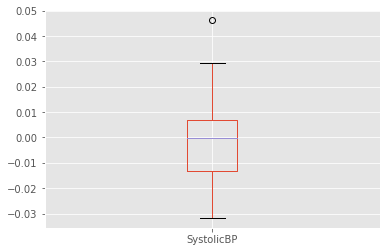

In [39]:
predictions = ridgecv.predict(x_test)
residuals = predictions - y_test
residuals.plot(kind='box')
plt.show()

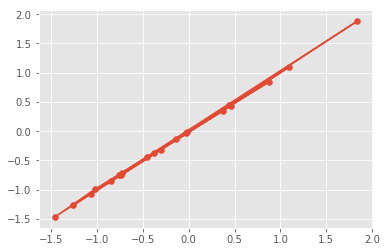

In [40]:
plt.scatter(y_test, predictions)
plt.plot(y_test, predictions)
plt.show()